# **DRZEWO DECYZYJNE ROZPOZNAWANIE JADALNYCH I TRUJĄCYCH GRZYBÓW**

### IMPORT DANYCH

In [1]:
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math

mushroom = fetch_ucirepo(id=73) 
mushroom.data.features = np.array(mushroom.data.features)
mushroom.data.targets = np.array(mushroom.data.targets)

In [2]:
print("Wymiary danych :", mushroom.data.features.shape)

Wymiary danych : (8124, 22)


In [3]:
unique, counts = np.unique(mushroom.data.targets, return_counts=True)
print("Ilosc grzybow jadalnych w zbiorze : ", counts[0], ", niejadalnych : ", counts[1], "\n")

Ilosc grzybow jadalnych w zbiorze :  4208 , niejadalnych :  3916 



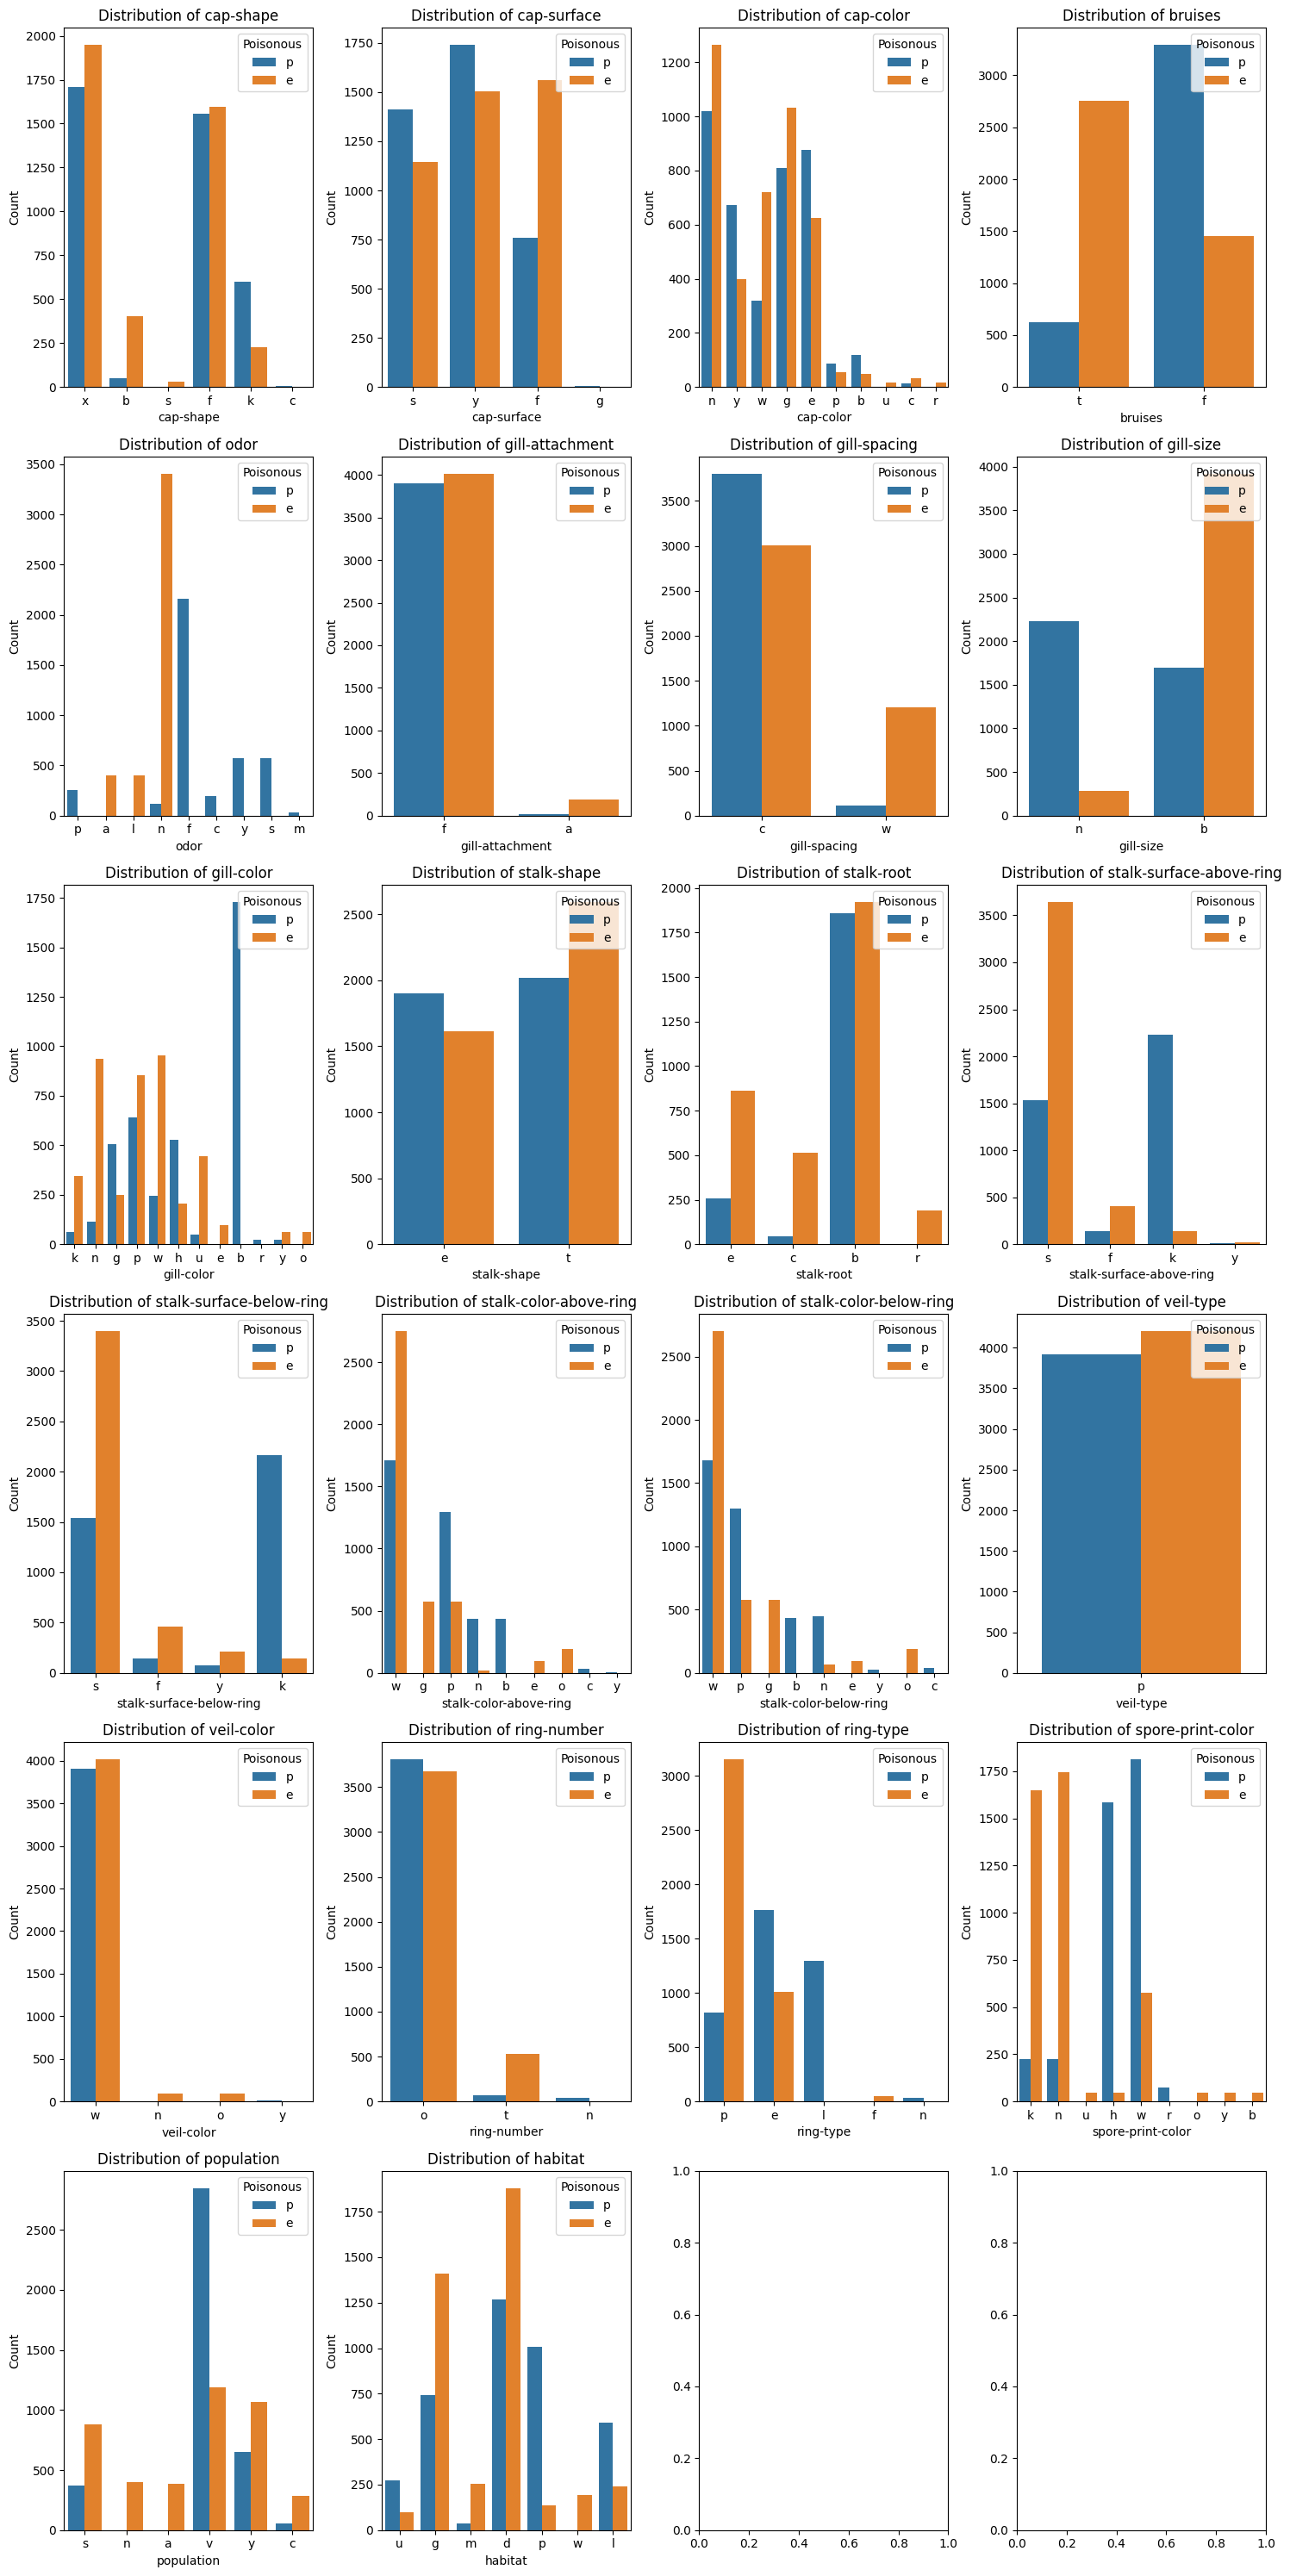

In [4]:
#Rozkłady kategorii
all_attributes = mushroom.data.headers[:-1]
num_plots = len(all_attributes)
num_cols = 4
num_rows = int(math.ceil(num_plots / num_cols))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, attribute in enumerate(all_attributes):
    row, col = divmod(i, num_cols)
    sns.countplot(x=attribute, hue='poisonous', data=mushroom.data.original, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {attribute}')
    axes[row, col].set_xlabel(attribute)
    axes[row, col].set_ylabel('Count')
    axes[row, col].legend(title='Poisonous', loc='upper right')

plt.tight_layout()
plt.show()

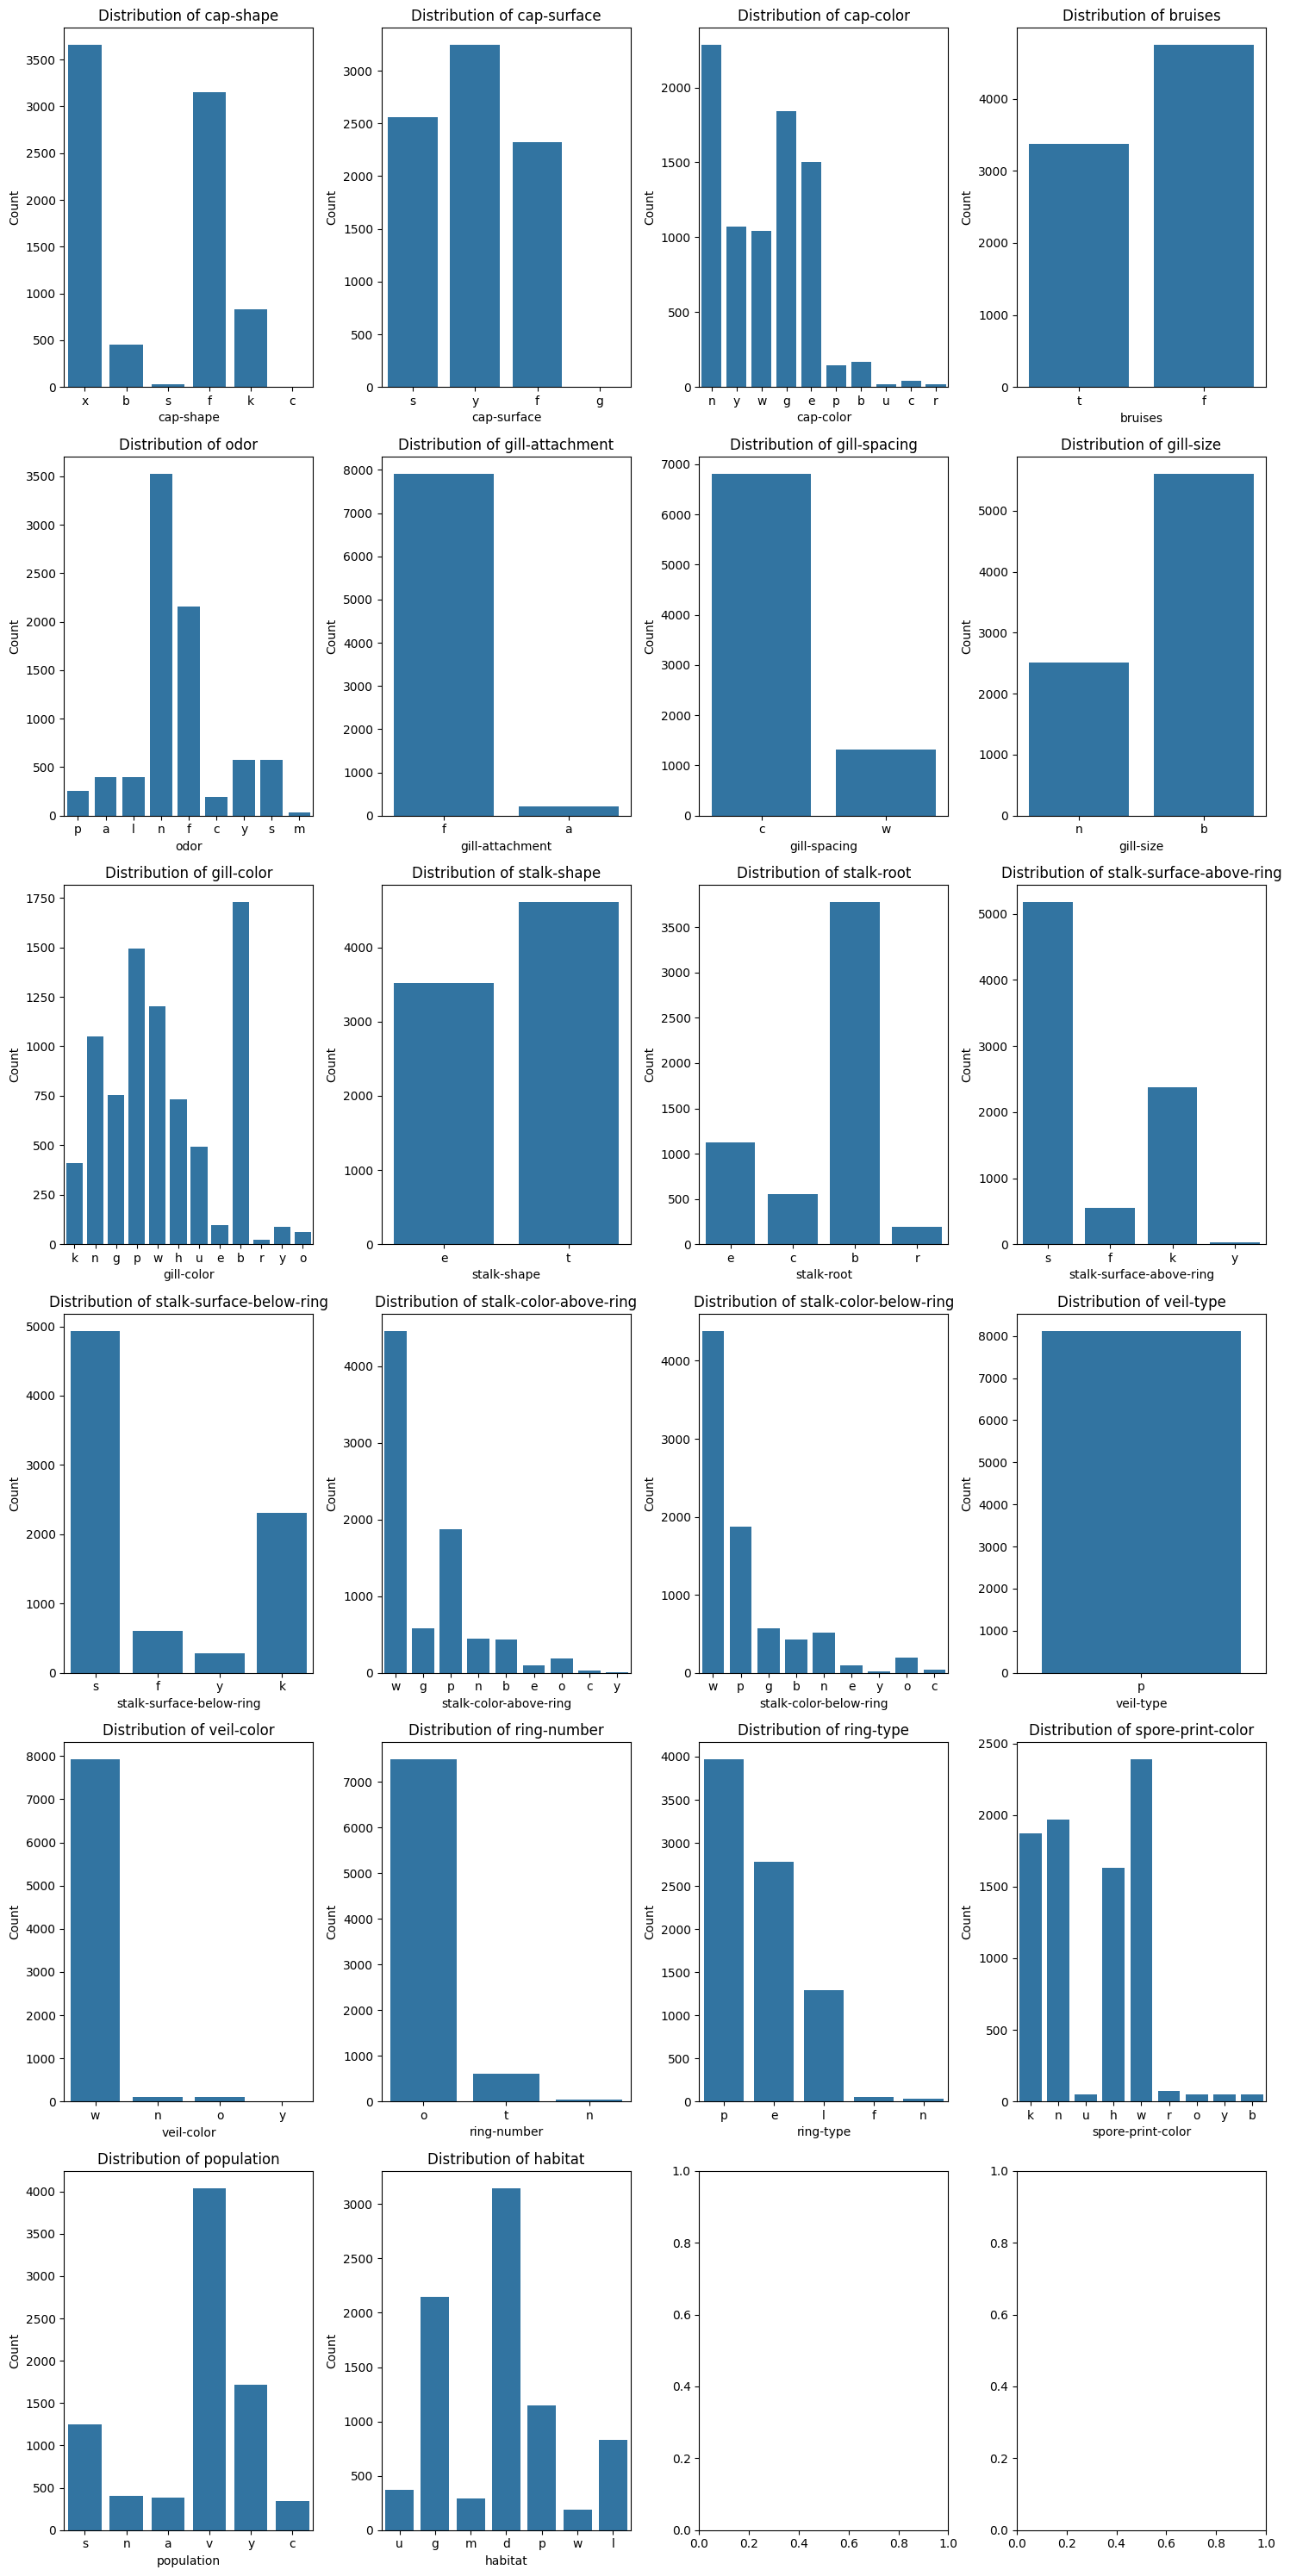

In [5]:
#Rozkłady częstości
all_attributes = mushroom.data.headers[:-1]

num_plots = len(all_attributes)
num_cols = 4 
num_rows = int(math.ceil(num_plots / num_cols))
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, attribute in enumerate(all_attributes):
    row, col = divmod(i, num_cols)
    sns.countplot(x=attribute, data=mushroom.data.original, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {attribute}')
    axes[row, col].set_xlabel(attribute)
    axes[row, col].set_ylabel('Count')

plt.tight_layout()
plt.show()

### FORMATOWANIE DANYCH

In [6]:
en = OrdinalEncoder(dtype=int, encoded_missing_value=-1)
en.fit(mushroom.data.features)
mushroomFitFeatures = en.transform(mushroom.data.features)
en.fit(mushroom.data.targets)
mushroomFitTargets = en.transform(mushroom.data.targets)

TRAIN_DATA, TEST_DATA, TRAIN_TARGET, TEST_TARGET = train_test_split(mushroomFitFeatures, mushroomFitTargets, test_size=0.2)

crossVal = 25
maxDepth = 10

## **DRZEWA DECYZYJNE BEZ DODATKOWEJ OBRÓBKI DANYCH**

### DRZEWO DECYZYJNE (ENTROPY)

In [7]:
treeEnt = DecisionTreeClassifier(criterion="entropy", max_depth=maxDepth)
treeEnt.fit(TRAIN_DATA, TRAIN_TARGET)
pass

In [8]:
print(accuracy_score(TEST_TARGET, treeEnt.predict(TEST_DATA)))
print(confusion_matrix(TEST_TARGET,treeEnt.predict(TEST_DATA)))

1.0
[[841   0]
 [  0 784]]


In [9]:
crossValidationEnt = cross_val_score(DecisionTreeClassifier(criterion="entropy", max_depth=maxDepth), mushroomFitFeatures, mushroomFitTargets, cv=crossVal)
print(crossValidationEnt)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


### DRZEWO DECYZYJNE (GINI)

In [10]:
treeGini = DecisionTreeClassifier(criterion="gini", max_depth=maxDepth)
treeGini.fit(TRAIN_DATA, TRAIN_TARGET) 
pass

In [11]:
print(accuracy_score(TEST_TARGET, treeGini.predict(TEST_DATA)))
print(confusion_matrix(TEST_TARGET,treeGini.predict(TEST_DATA)))

1.0
[[841   0]
 [  0 784]]


In [12]:
crossValidationGini = cross_val_score(DecisionTreeClassifier(criterion="gini", max_depth=maxDepth), mushroomFitFeatures, mushroomFitTargets, cv=crossVal)
print(crossValidationGini)

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99076923 1.         1.
 1.        ]


### DRZEWO DECYZYJNE (LOG_LOSS)

In [13]:
treeLog = DecisionTreeClassifier(criterion="log_loss", max_depth=maxDepth)
treeLog.fit(TRAIN_DATA, TRAIN_TARGET)
pass

In [14]:
print(accuracy_score(TEST_TARGET, treeLog.predict(TEST_DATA)))
print(confusion_matrix(TEST_TARGET,treeLog.predict(TEST_DATA)))

1.0
[[841   0]
 [  0 784]]


In [15]:
crossValidationLog= cross_val_score(DecisionTreeClassifier(criterion="log_loss", max_depth=maxDepth), mushroomFitFeatures, mushroomFitTargets, cv=crossVal)
print(crossValidationLog)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]


## PORÓWNANIE WYNIKÓW

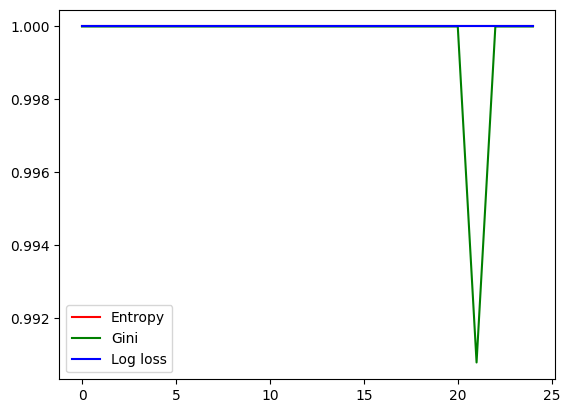

In [16]:
plt.plot(crossValidationEnt, color='r', label="Entropy")
plt.plot(crossValidationGini, color='g', label="Gini")
plt.plot(crossValidationLog, color='b', label="Log loss")
plt.legend()
plt.show()

## **FEATURE SELECT**

In [17]:
featToSelect = math.ceil(math.sqrt(mushroom.data.features.shape[1]))

### ENTROPY

In [18]:
entTree = DecisionTreeClassifier(criterion="entropy", max_depth=maxDepth)
featSel = RFE(entTree, n_features_to_select=featToSelect)
entFeatSel = featSel.fit_transform(mushroomFitFeatures, mushroomFitTargets)
crossValidationEnt = cross_val_score(entTree, entFeatSel, mushroomFitTargets, cv=crossVal)
print(crossValidationEnt)

[1.         1.         1.         1.         1.         1.
 0.99692308 1.         1.         1.         0.99076923 0.99384615
 0.99692308 0.99692308 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]


### GINI

In [19]:
giniTree = DecisionTreeClassifier(criterion="gini", max_depth=maxDepth)
featSel = RFE(giniTree, n_features_to_select=featToSelect)
giniFeatSel = featSel.fit_transform(mushroomFitFeatures, mushroomFitTargets)
crossValidationGini = cross_val_score(giniTree, giniFeatSel, mushroomFitTargets, cv=crossVal)
print(crossValidationGini)

[0.96307692 0.96       0.95384615 0.94153846 0.98153846 0.99076923
 1.         1.         1.         0.99384615 0.99692308 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]


### LOG LOSS

In [20]:
logTree = DecisionTreeClassifier(criterion="log_loss", max_depth=maxDepth)
featSel = RFE(logTree, n_features_to_select=featToSelect)
logFeatSel = featSel.fit_transform(mushroomFitFeatures, mushroomFitTargets)
crossValidationLog = cross_val_score(logTree, logFeatSel, mushroomFitTargets, cv=crossVal)
print(crossValidationLog)

[1.         1.         1.         1.         1.         1.
 0.99692308 1.         1.         1.         0.99076923 0.99384615
 0.99692308 0.99692308 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]


### PORÓWNANIE WYNIKÓW

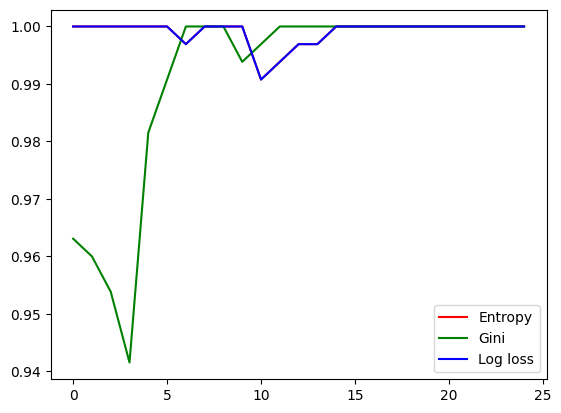

In [21]:
plt.plot(crossValidationEnt, color='r',label="Entropy")
plt.plot(crossValidationGini, color='g', label="Gini")
plt.plot(crossValidationLog, color='b', label="Log loss")
plt.legend()
plt.show()

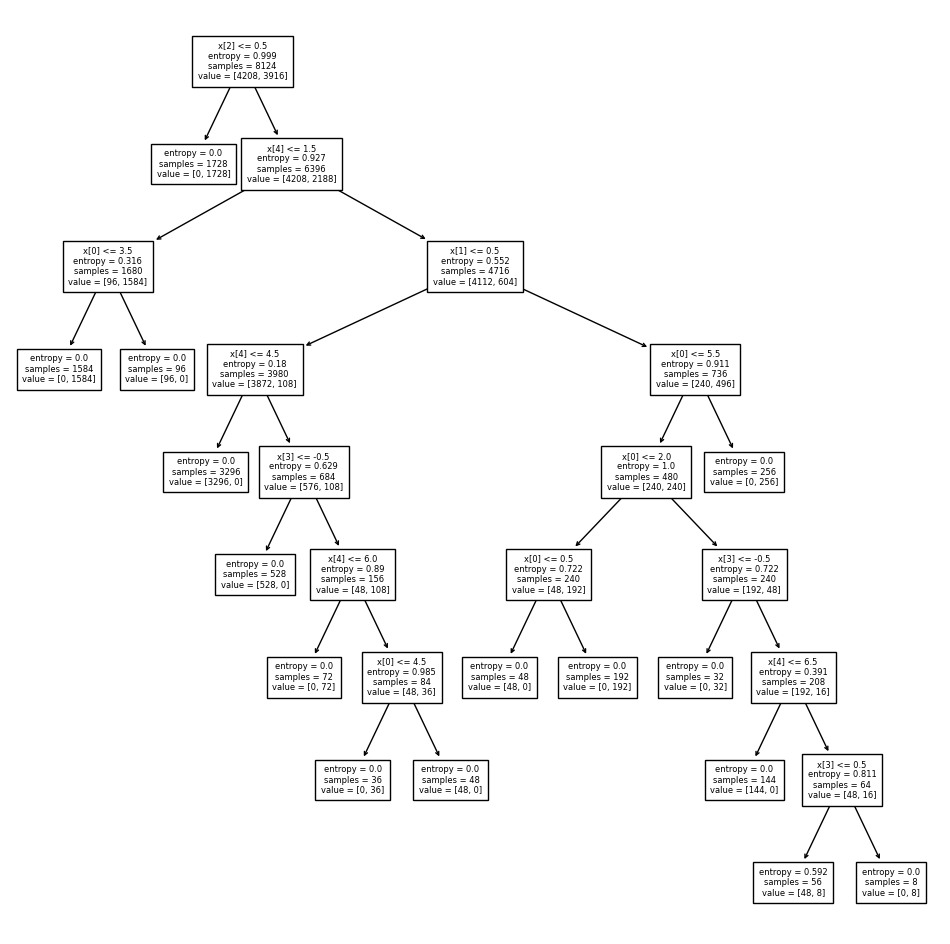

In [22]:
entTree.fit(entFeatSel, mushroomFitTargets)
plt.figure(figsize=(12,12))
tree.plot_tree(entTree, fontsize=6)
pass

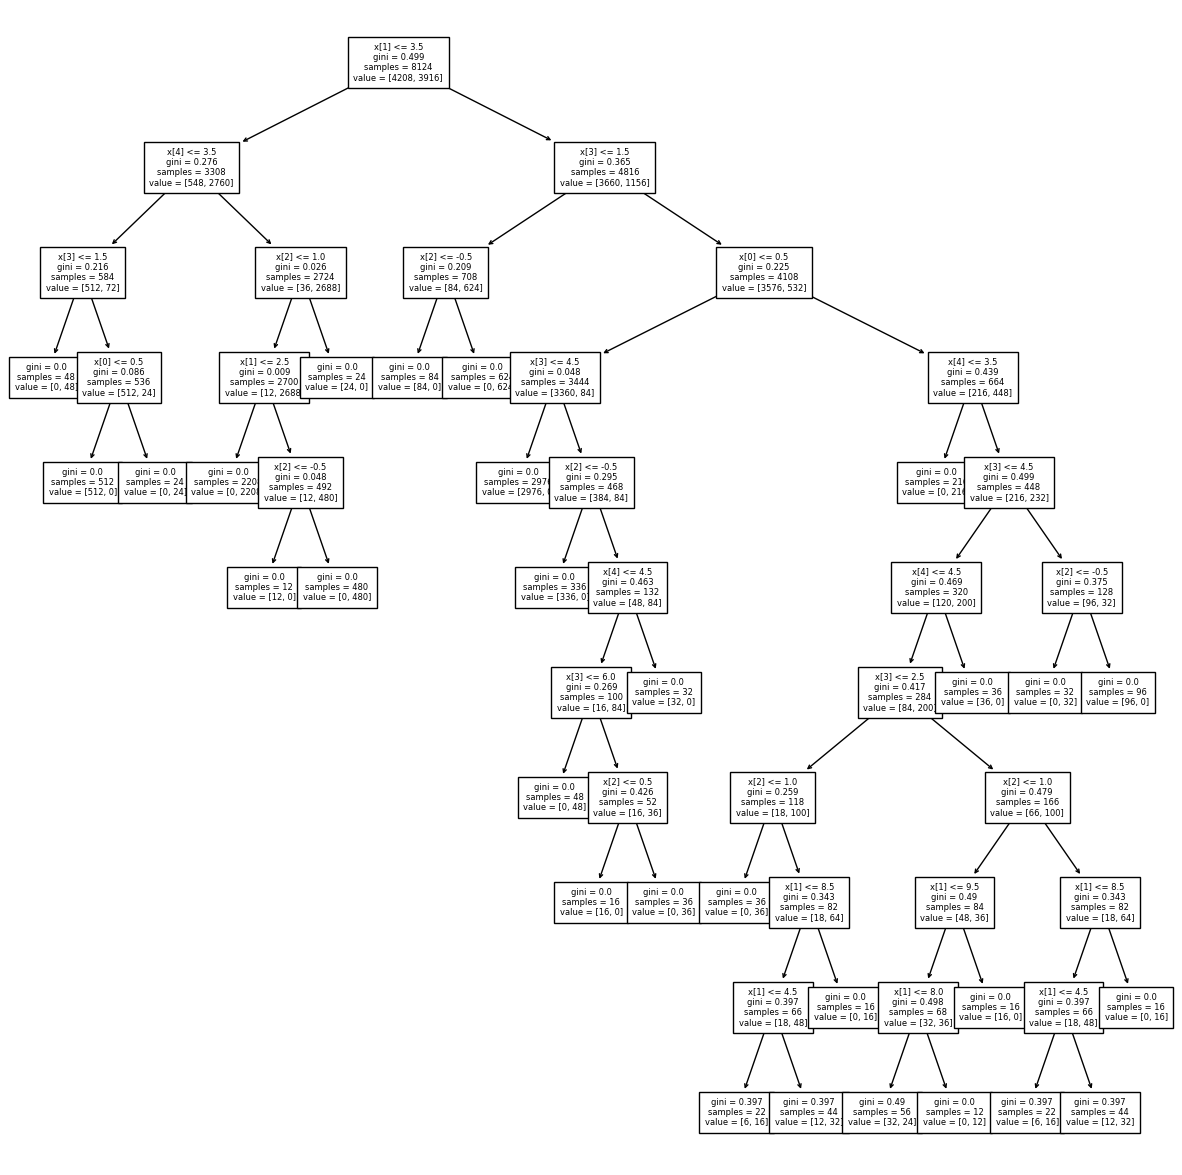

In [23]:
giniTree.fit(giniFeatSel, mushroomFitTargets)
plt.figure(figsize=(15,15))
tree.plot_tree(giniTree, fontsize=6)
pass

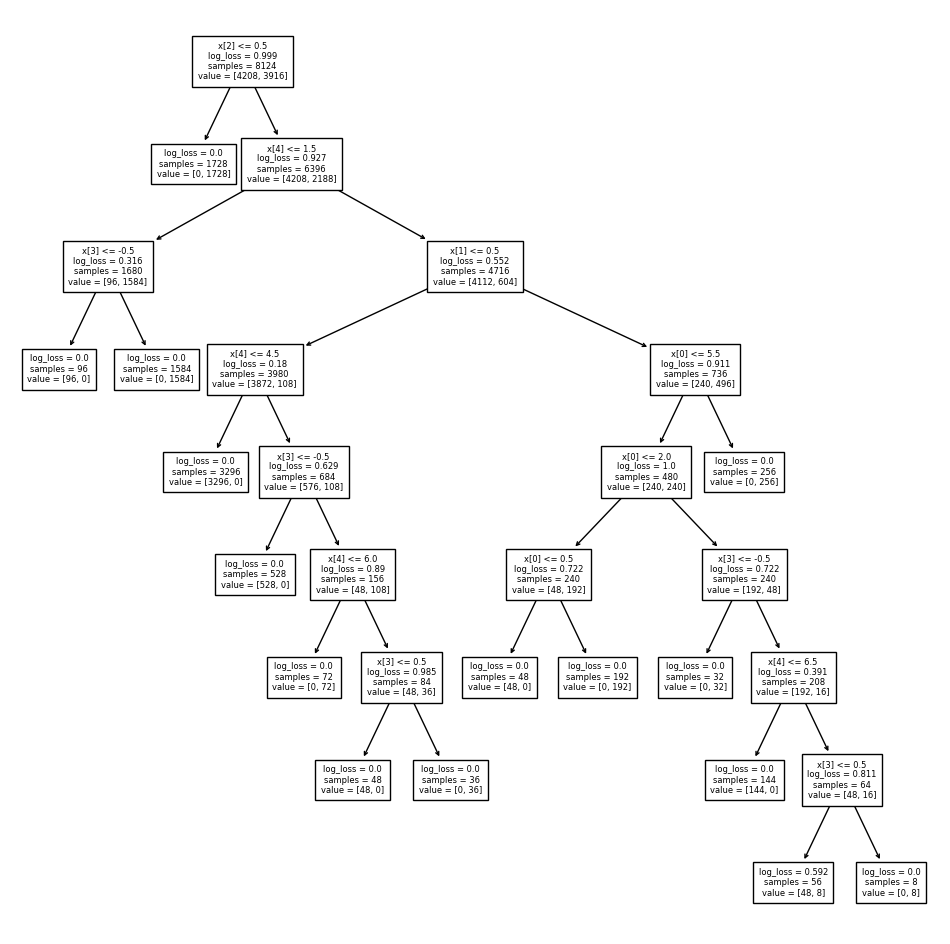

In [24]:
logTree.fit(logFeatSel, mushroomFitTargets)
plt.figure(figsize=(12,12))
tree.plot_tree(logTree, fontsize=6)
pass

## **WIELE KLASYFIKATORÓW (RANDOM FOREST)**

In [25]:
nEst = 50
mushroomFitTargets = mushroomFitTargets.reshape(-1)
TRAIN_TARGET = TRAIN_TARGET.reshape(-1)

## ENTROPY

In [26]:
entForest = RandomForestClassifier(criterion="entropy", max_depth=maxDepth, n_estimators=nEst)
featSel = RFE(entForest, n_features_to_select=featToSelect)
entForestFeatSel = featSel.fit_transform(mushroomFitFeatures, mushroomFitTargets)
crossValidationEnt = cross_val_score(entForest, entForestFeatSel, mushroomFitTargets, cv=crossVal)
print(crossValidationEnt)

[1.         1.         1.         1.         1.         1.
 0.99692308 1.         1.         1.         0.99076923 0.99384615
 0.99692308 0.99692308 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]


## GINI

In [27]:
giniForest = RandomForestClassifier(criterion="gini", max_depth=maxDepth, n_estimators=nEst)
featSel = RFE(giniForest, n_features_to_select=featToSelect)
giniForestFeatSel = featSel.fit_transform(mushroomFitFeatures, mushroomFitTargets)
crossValidationGini = cross_val_score(giniForest, giniForestFeatSel, mushroomFitTargets, cv=crossVal)
print(crossValidationGini)

[1.         1.         1.         1.         1.         1.
 0.99692308 0.99692308 0.99384615 0.99384615 0.98461538 0.96
 1.         0.98461538 0.99076923 1.         1.         1.
 1.         1.         0.92923077 0.92615385 0.99692308 0.99076923
 1.        ]


## LOG LOSS

In [28]:
logForest = RandomForestClassifier(criterion="log_loss", max_depth=maxDepth, n_estimators=nEst)
featSel = RFE(logForest, n_features_to_select=featToSelect)
logForestFeatSel = featSel.fit_transform(mushroomFitFeatures, mushroomFitTargets)
crossValidationLog = cross_val_score(logForest, logForestFeatSel, mushroomFitTargets, cv=crossVal)
print(crossValidationLog)

[1.         1.         1.         1.         1.         1.
 0.99692308 1.         1.         1.         0.99076923 0.99384615
 0.99692308 0.99692308 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]


## PORÓWNANIE WYNIKÓW

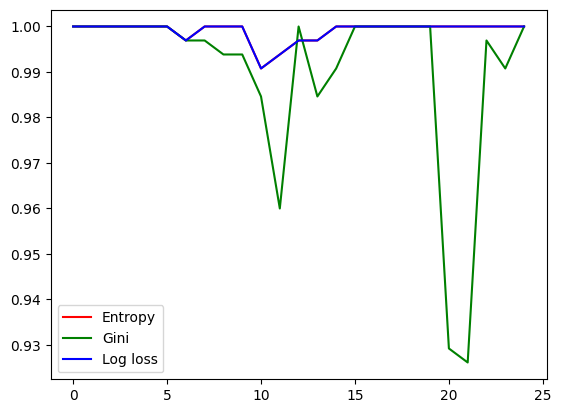

In [29]:
plt.plot(crossValidationEnt, color='r', label="Entropy")
plt.plot(crossValidationGini, color='g', label="Gini")
plt.plot(crossValidationLog, color='b', label="Log loss")
plt.legend()
plt.show()